# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [2]:
import pandas_datareader.data as web

Primero importaremos datos desde un archivo con extensión `.csv`

In [7]:
import pandas as pd

data = pd.read_csv("FB.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000
...,...,...,...,...,...,...,...
1001,2018-12-24,123.099998,129.740005,123.019997,124.059998,124.059998,22066000
1002,2018-12-26,126.000000,134.240005,125.889999,134.179993,134.179993,39723400
1003,2018-12-27,132.440002,134.990005,129.669998,134.520004,134.520004,31202500
1004,2018-12-28,135.339996,135.919998,132.199997,133.199997,133.199997,22627600


In [8]:
data.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000
...,...,...,...,...,...,...,...
95,2015-05-20,80.470001,81.099998,79.459999,80.550003,80.550003,23056900
96,2015-05-21,80.190002,80.919998,80.080002,80.480003,80.480003,13402700
97,2015-05-22,80.349998,81.309998,80.250000,80.540001,80.540001,19567900
98,2015-05-26,80.430000,80.599998,79.080002,79.330002,79.330002,16321300


In [9]:
data.tail() #Ultimos

,Date,Open,High,Low,Close,Adj Close,Volume
1001,2018-12-24,123.099998,129.740005,123.019997,124.059998,124.059998,22066000
1002,2018-12-26,126.000000,134.240005,125.889999,134.179993,134.179993,39723400
1003,2018-12-27,132.440002,134.990005,129.669998,134.520004,134.520004,31202500
1004,2018-12-28,135.339996,135.919998,132.199997,133.199997,133.199997,22627600
1005,2018-12-31,134.449997,134.639999,129.949997,131.089996,131.089996,24625300


In [13]:
data[ (data["Open"]>140) & (data["Open"]<141)]

,Date,Open,High,Low,Close,Adj Close,Volume
554,2017-03-16,140.199997,140.250000,139.729996,139.990005,139.990005,13612900
555,2017-03-17,140.339996,140.339996,139.699997,139.839996,139.839996,20592800
560,2017-03-24,140.080002,141.020004,139.759995,140.339996,140.339996,16664700
562,2017-03-28,140.360001,141.949997,140.009995,141.759995,141.759995,14679400
572,2017-04-11,140.800003,141.029999,138.809998,139.919998,139.919998,16638100
988,2018-12-04,140.729996,143.389999,137.160004,137.929993,137.929993,30307400


In [15]:
data["Adj Close"].mean()

133.4131908001988

In [19]:
data["Adj Close"].std()

35.828239718538676

In [16]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,133.385427,134.675159,132.009553,133.413191,133.413191,2.422082e+07
std,35.783907,36.081929,35.506553,35.828240,35.828240,1.463149e+07
min,74.040001,74.830002,72.000000,74.050003,74.050003,5.913100e+06
25%,105.240002,106.249998,104.005001,105.047497,105.047497,1.561465e+07
50%,129.195000,129.979996,128.244996,129.150002,129.150002,2.034995e+07
75%,167.420002,168.955002,165.800000,167.407501,167.407501,2.715410e+07
max,215.720001,218.619995,214.270004,217.500000,217.500000,1.698037e+08


Ahora lo haremos desde Yahoo Finance

In [24]:
web.DataReader?
yf.download?

In [41]:
!pip install yfinance

In [42]:
import yfinance as yf
yf.download?

In [46]:
data = yf.download("TSLA", start = "1980-02-24", end = "2022-12-31")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


In [48]:
data = yf.download("TSLA", start = "2022-01-01", end = "2022-12-31")
data.describe()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,264.135232,270.567716,256.507357,263.093081,263.093081,8.693633e+07
std,57.849029,58.918525,56.567239,57.814356,57.814356,2.949649e+07
min,110.349998,116.269997,108.239998,109.099998,109.099998,4.186470e+07
25%,224.556664,230.040001,218.018333,224.803329,224.803329,6.685095e+07
50%,272.679993,280.786682,265.739990,271.706665,271.706665,8.203590e+07
75%,301.808334,309.603333,295.346664,302.528320,302.528320,9.778950e+07
max,396.516663,402.666656,378.679993,399.926666,399.926666,2.219233e+08


#### La api de yahoo es inestable. Puede ser que nos toque intentar varias veces antes de tener éxito

<AxesSubplot:xlabel='Date'>

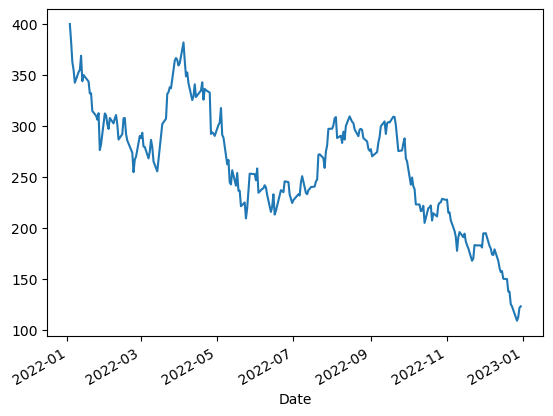

In [50]:
data["Adj Close"].plot()

<AxesSubplot:xlabel='Date'>

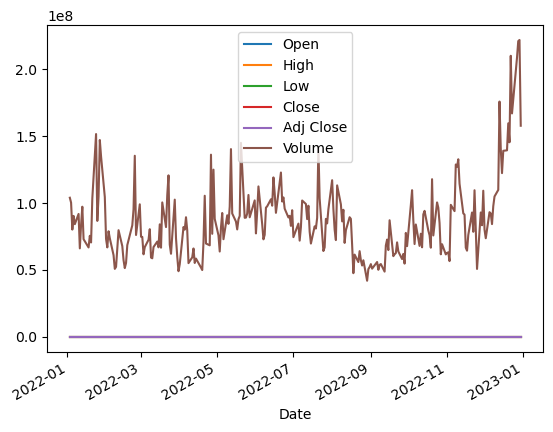

In [51]:
data.plot()

¿Cómo lucen estos datos?

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [65]:
def getclose(name, start, end) : 
    return yf.download(name, start = start, end = end)["Adj Close"]
getclose(["TSLA", "AAPL"], "2022-12-01", "2022-12-31")

[*********************100%***********************]  2 of 2 completed


,AAPL,TSLA
Date,,
2022-12-01,148.083893,194.699997
2022-12-02,147.584656,194.860001
2022-12-05,146.406464,182.449997
2022-12-06,142.692139,179.820007
2022-12-07,140.725143,174.039993
2022-12-08,142.432526,173.440002
2022-12-09,141.943283,179.050003
2022-12-12,144.269730,167.820007
2022-12-13,145.248230,160.949997


In [69]:
names = ["AMZN", 
         "NFLX", 
         "DIS", 
         "TSLA", 
         "GM"]
data = getclose(names, "2023-02-01", "2023-02-28").describe()

[*********************100%***********************]  5 of 5 completed


[*********************100%***********************]  5 of 5 completed


<AxesSubplot:xlabel='Date'>

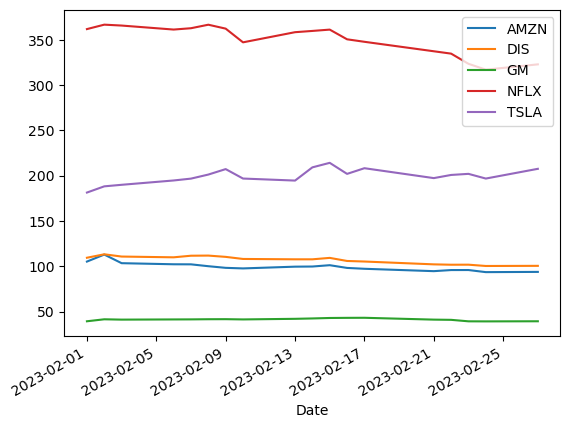

In [70]:
names = ["AMZN", 
         "NFLX", 
         "DIS", 
         "TSLA", 
         "GM"]
getclose(names, "2023-02-01", "2023-02-28").plot()

<AxesSubplot:ylabel='Frequency'>

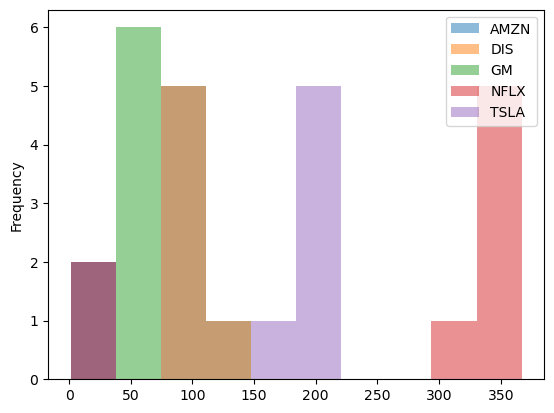

In [71]:
data.plot.hist(alpha=0.5)

## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [75]:
names = ["BIMBOA.MX"]
data = getclose(names, "2023-02-01", "2023-02-28")

[*********************100%***********************]  1 of 1 completed


In [76]:
data

Date
2023-02-01    94.059998
2023-02-02    93.000000
2023-02-03    93.629997
2023-02-07    91.209999
2023-02-08    90.739998
2023-02-09    90.260002
2023-02-10    89.070000
2023-02-13    89.629997
2023-02-14    88.690002
2023-02-15    89.580002
2023-02-16    88.900002
2023-02-17    87.389999
2023-02-20    88.800003
2023-02-21    87.760002
2023-02-22    86.690002
2023-02-23    87.190002
2023-02-24    88.230003
2023-02-27    89.260002
Name: Adj Close, dtype: float64

In [77]:
m = len(data)
m

18

In [86]:
resultado = []
for i in range (m-1) : 
    rendimiento = (data[i+1] - data[i])/data[i]
    resultado.append(rendimiento)
resultado

[-0.011269376845703562,
 0.006774164015246976,
 -0.02584639794867633,
 -0.005152957191325493,
 -0.005289792140613595,
 -0.013184161458473771,
 0.006287162462248116,
 -0.01048750240786014,
 0.01003494604971313,
 -0.0075909833810702786,
 -0.016985400565948303,
 0.016134611190721595,
 -0.011711721619211777,
 -0.01219233897878957,
 0.005767677770432062,
 0.01192798355781959,
 0.0116740194957267]

In [87]:
data.shift()

Date
2023-02-01          NaN
2023-02-02    94.059998
2023-02-03    93.000000
2023-02-07    93.629997
2023-02-08    91.209999
2023-02-09    90.739998
2023-02-10    90.260002
2023-02-13    89.070000
2023-02-14    89.629997
2023-02-15    88.690002
2023-02-16    89.580002
2023-02-17    88.900002
2023-02-20    87.389999
2023-02-21    88.800003
2023-02-22    87.760002
2023-02-23    86.690002
2023-02-24    87.190002
2023-02-27    88.230003
Name: Adj Close, dtype: float64

In [88]:
R = (data - data.shift())/data.shift()
R

Date
2023-02-01         NaN
2023-02-02   -0.011269
2023-02-03    0.006774
2023-02-07   -0.025846
2023-02-08   -0.005153
2023-02-09   -0.005290
2023-02-10   -0.013184
2023-02-13    0.006287
2023-02-14   -0.010488
2023-02-15    0.010035
2023-02-16   -0.007591
2023-02-17   -0.016985
2023-02-20    0.016135
2023-02-21   -0.011712
2023-02-22   -0.012192
2023-02-23    0.005768
2023-02-24    0.011928
2023-02-27    0.011674
Name: Adj Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

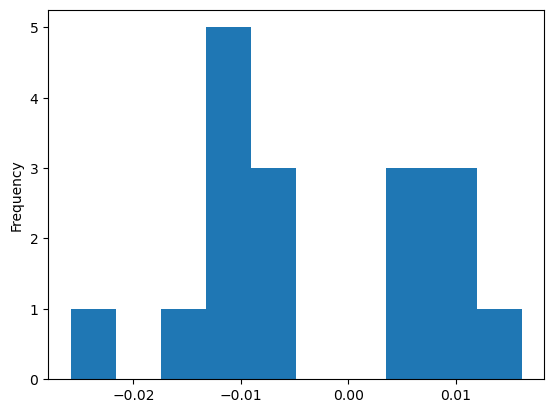

In [90]:
R.plot.hist()

In [91]:
R = R.dropna()
R

Date
2023-02-02   -0.011269
2023-02-03    0.006774
2023-02-07   -0.025846
2023-02-08   -0.005153
2023-02-09   -0.005290
2023-02-10   -0.013184
2023-02-13    0.006287
2023-02-14   -0.010488
2023-02-15    0.010035
2023-02-16   -0.007591
2023-02-17   -0.016985
2023-02-20    0.016135
2023-02-21   -0.011712
2023-02-22   -0.012192
2023-02-23    0.005768
2023-02-24    0.011928
2023-02-27    0.011674
Name: Adj Close, dtype: float64

In [97]:
(R+1).cumprod()*data[0]

Date
2023-02-02    93.000000
2023-02-03    93.629997
2023-02-07    91.209999
2023-02-08    90.739998
2023-02-09    90.260002
2023-02-10    89.070000
2023-02-13    89.629997
2023-02-14    88.690002
2023-02-15    89.580002
2023-02-16    88.900002
2023-02-17    87.389999
2023-02-20    88.800003
2023-02-21    87.760002
2023-02-22    86.690002
2023-02-23    87.190002
2023-02-24    88.230003
2023-02-27    89.260002
Name: Adj Close, dtype: float64

In [98]:
data

Date
2023-02-01    94.059998
2023-02-02    93.000000
2023-02-03    93.629997
2023-02-07    91.209999
2023-02-08    90.739998
2023-02-09    90.260002
2023-02-10    89.070000
2023-02-13    89.629997
2023-02-14    88.690002
2023-02-15    89.580002
2023-02-16    88.900002
2023-02-17    87.389999
2023-02-20    88.800003
2023-02-21    87.760002
2023-02-22    86.690002
2023-02-23    87.190002
2023-02-24    88.230003
2023-02-27    89.260002
Name: Adj Close, dtype: float64

y la gráfica de los rendimientos se puede obtener como...

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.


Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.